In [4]:
import os
import cv2
import numpy as np

In [36]:
# import cv2
# import os

# Define the input and output directories
input_dir = r"C:\Users\rokzc\biodata\MMU-Iris-Database"
output_dir = r"C:\Users\rokzc\biodata\MMU-Iris-Database3"

# Loop over all subdirectories in the input directory
for subdir in os.listdir(input_dir):
    # Check if the subdirectory name is a number
    if subdir.isdigit():
        # Loop over the left and right subdirectories
        for subsubdir in ['left', 'right']:
            # Construct the path to the subdirectory
            subpath = os.path.join(input_dir, subdir, subsubdir)
            # Loop over all image files in the subdirectory
            for filename in os.listdir(subpath):
                # Load the image file
                img_path = os.path.join(subpath, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                # Check if the image is not empty
                if img is not None:
                    # Normalize the image size
                    resized = cv2.resize(img, (320, 240))
                    # Apply histogram equalization to enhance contrast
                    equalized = cv2.equalizeHist(resized)
                    # Apply a circular mask to the iris region within the eye
                    mask = np.zeros_like(resized)
                    cv2.circle(mask, (160, 120), 60, 255, -1)
                    masked = cv2.bitwise_and(equalized, mask)
                    # Apply a log-polar transform to the masked iris region
                    polar = cv2.warpPolar(masked, (240, 360), (120, 80), 60, cv2.INTER_LINEAR + cv2.WARP_POLAR_LOG)
                    # Normalize the polar image to a standard size and shape
                    normalized = cv2.resize(masked, (160,120))
                    # Construct the output directory path
                    out_dir = os.path.join(output_dir, subdir, subsubdir)
                    os.makedirs(out_dir, exist_ok=True)
                    # Construct the output image file path
                    out_path = os.path.join(out_dir, filename)
                    # Save the normalized image to disk
                    cv2.imwrite(out_path, normalized)
                else:
                    print(f'Error: Failed to load image {img_path}')


In [11]:
import numpy as np
import os
import cv2
import keras
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers


from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the input directory containing the preprocessed iris images
input_dir = r"C:\Users\rokzc\biodata\MMU-Iris-Database"

# Define the parameters for the DeepIrisNet model
input_shape = (64, 64, 1)
num_classes = 47
dropout_rate = 0.2

# Load the preprocessed iris images and labels
X = []
y = []
for subdir in os.listdir(input_dir):
    if subdir.isdigit():
        for subsubdir in ['left', 'right']:
            for filename in os.listdir(os.path.join(input_dir, subdir, subsubdir)):
                img = cv2.imread(os.path.join(input_dir, subdir, subsubdir, filename), cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (input_shape[0], input_shape[1]))
                img = np.expand_dims(img, axis=-1)
                X.append(img)
                y.append(int(subdir))
X = np.array(X)
y = np.array(y)
data_augmentation =  tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),layers.experimental.preprocessing.RandomRotation(0.2),])

print(y)


[ 1  1  1  1  1  1  1  1  1  1 10 10 10 10 10 10 10 10 10 10 11 11 11 11
 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13
 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16
 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18
 18 18 18 18 19 19 19 19 19 19 19 19 19 19  2  2  2  2  2  2  2  2  2  2
 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22
 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24
 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27
 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29
 29 29 29 29  3  3  3  3  3  3  3  3  3  3 30 30 30 30 30 30 30 30 30 30
 31 31 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32 32 33 33 33 33
 33 33 33 33 33 33 34 34 34 34 34 34 34 34 34 34 35 35 35 35 35 35 35 35
 35 35 36 36 36 36 36 36 36 36 36 36 37 37 37 37 37 37 37 37 37 37 38 38
 38 38 38 38 38 38 38 38 39 39 39 39 39 39 39 39 39

Epoch 1/30
12/12 [==============================] - 2s 132ms/step - loss: 3.9275 - accuracy: 0.0222 - val_loss: 3.8575 - val_accuracy: 0.0111
Epoch 2/30
12/12 [==============================] - 1s 110ms/step - loss: 3.8375 - accuracy: 0.0250 - val_loss: 3.8862 - val_accuracy: 0.0000e+00
Epoch 3/30
12/12 [==============================] - 1s 112ms/step - loss: 3.8191 - accuracy: 0.0222 - val_loss: 3.9249 - val_accuracy: 0.0000e+00
Epoch 4/30
12/12 [==============================] - 1s 110ms/step - loss: 3.8187 - accuracy: 0.0167 - val_loss: 3.8657 - val_accuracy: 0.0222
Epoch 5/30
12/12 [==============================] - 1s 121ms/step - loss: 3.8192 - accuracy: 0.0250 - val_loss: 3.9292 - val_accuracy: 0.0111
Epoch 6/30
12/12 [==============================] - 1s 117ms/step - loss: 3.7956 - accuracy: 0.0278 - val_loss: 3.9557 - val_accuracy: 0.0111
Epoch 7/30
12/12 [==============================] - 1s 119ms/step - loss: 3.7974 - accuracy: 0.0250 - val_loss: 3.8863 - val_accuracy: 0.011

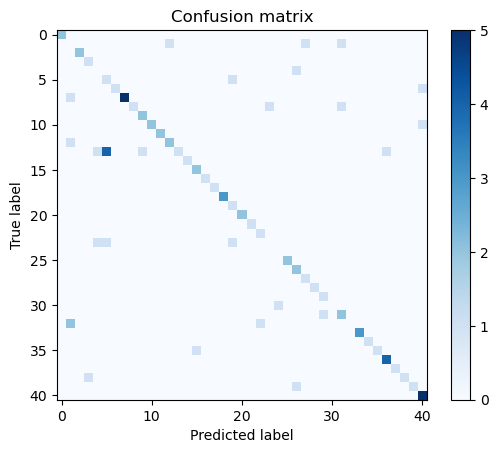

In [12]:
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

IMAGE_SIZE=64
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),layers.experimental.preprocessing.Rescaling(1.0/255)
])


# Convert the labels to categorical
y = keras.utils.to_categorical(y, num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the DeepIrisNet model
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout_rate))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout_rate))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout_rate))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred_classes == y_test_classes)
print('Test accuracy:', accuracy)

# Plot a confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Save the model
model.save('deepirisnet_model_preprocessed3.h5')


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout_rate))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout_rate))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout_rate))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(num_classes, activation='softmax'))